# 2量子ビット回路と測定
# 演習2の回答


問題：

次の回路をプログラミングし、状態ベクトルシミュレーターとQASMシミュレーターで実行し、QASMシミュレーターの結果はヒストグラムで表示してみましょう。

(1) $X|0\rangle \otimes X|0\rangle$

(2) $H|1\rangle \otimes H|1\rangle$


In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}

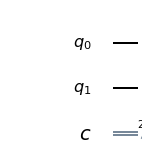

In [3]:
# 2量子ビット回路を用意
q1 = QuantumCircuit(2,2)    # ２量子ビット回路と２ビットの古典レジスターを用意します。

# 回路を描画
q1.draw(output="mpl")

### (1) $X|0\rangle \otimes X|0\rangle$ の回答

$X$ゲートをそれぞれの量子ビットに操作してみます。

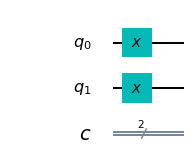

In [4]:
# 量子ゲートで回路を作成
q1.x(0)   # Xゲートを量子ビットq0に操作します。
q1.x(1)   # Xゲートを量子ビットq1に操作します。

# 回路を描画
q1.draw(output="mpl")

状態ベクトルシミュレーターを使って実行してみます。

In [5]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q1, vector_sim )
result = job.result().get_statevector(q1, decimals=3)

print(result)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


$X|0\rangle \otimes X|0\rangle=|1\rangle \otimes |1\rangle = |11\rangle $

測定回路を追加します。

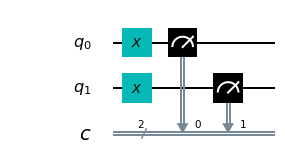

In [20]:
# 回路を測定
q1.measure(0,0)
q1.measure(1,1)

# 回路を描画
q1.draw(output='mpl')

{'11': 1024}


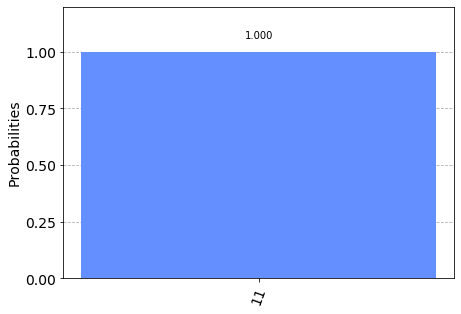

In [21]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q1, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q1)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|11\rangle$の状態が100%の確率で測定されました。

### (2) $H|1\rangle \otimes H|1\rangle$ の回答

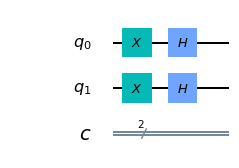

In [22]:
# 2量子ビット回路を用意
q2 = QuantumCircuit(2,2)    # ２量子ビット回路と２ビットの古典レジスターを用意します。

# 量子ゲートで回路を作成
q2.x(0)   # Xゲートを量子ビットq0に操作します。
q2.h(0)   # Hゲートを量子ビットq0に操作します。
q2.x(1)   # Xゲートを量子ビットq1に操作します。
q2.h(1)   # Hゲートを量子ビットq1に操作します。

# 回路を描画
q2.draw(output="mpl")

In [23]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q2, vector_sim )
result = job.result().get_statevector(q2, decimals=3)

print(result)

[ 0.5-0.j -0.5+0.j -0.5+0.j  0.5-0.j]


$H|1\rangle \otimes H|1\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \frac{1}{2}(|00\rangle-|01\rangle-|10\rangle+|11\rangle)$

なので、$(0.5, -0.5, -0.5,   0.5)$ が実行結果になります。

測定回路を追加します。


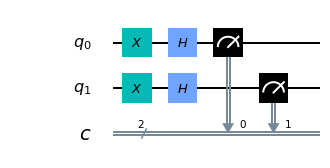

In [24]:
# 回路を測定
q2.measure(0,0)
q2.measure(1,1)

# 回路を描画
q2.draw(output='mpl')

{'00': 239, '01': 244, '10': 276, '11': 265}


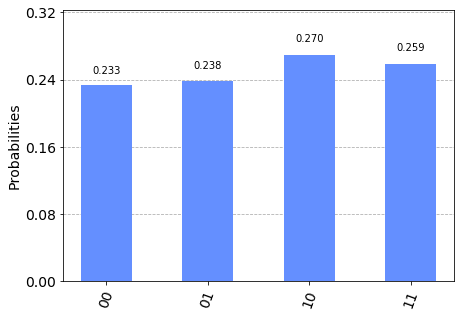

In [25]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q2, backend=simulator, shots=1024)
result = job.result()

##  測定された回数を表示
counts = result.get_counts(q2)
print(counts)

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。